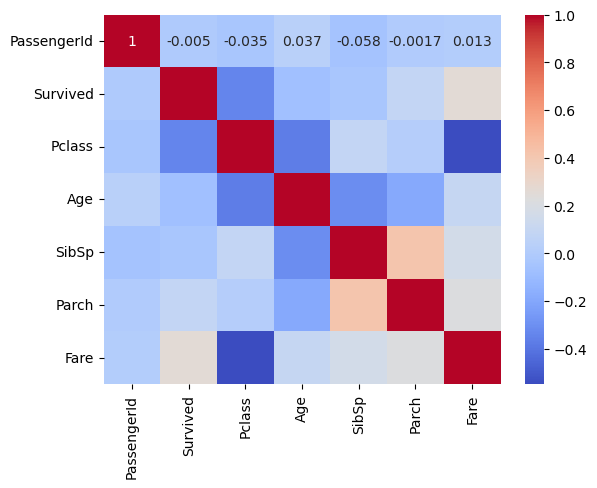

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Eliminar columnas no numéricas para calcular la correlación
data_numeric = data.select_dtypes(include=[float, int])

# Correlación entre las variables numéricas
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
# Eliminar columnas no necesarias
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Tratar valores nulos
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Rellenar valores nulos de 'Age' con la media
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Rellenar nulos de 'Embarked' con el valor más frecuente

# Convertir la variable categórica 'Sex' en numérica
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convertir la variable categórica 'Embarked' en numérica
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verifica si hay valores nulos
print(data.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [20]:
# Ver correlación entre las variables
correlations = data.corr()
print(correlations['Survived'].sort_values(ascending=False))

# Selección de las características más relevantes
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Variables predictoras
y = data['Survived']  # Variable objetivo


Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


In [24]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
model = LogisticRegression(max_iter=200)

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Precisión: 0.7988826815642458
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



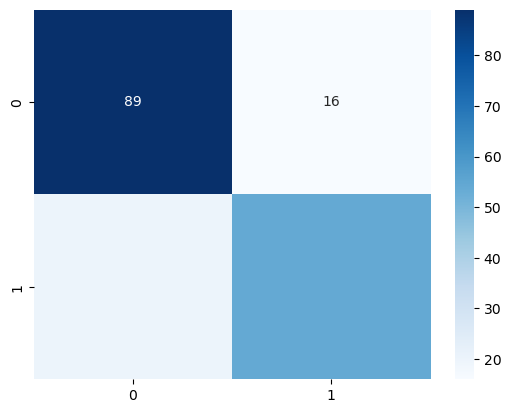

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicción en el conjunto de test
y_pred = model.predict(X_test)

# Imprimir métricas de evaluación
print('Precisión:', accuracy_score(y_test, y_pred))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


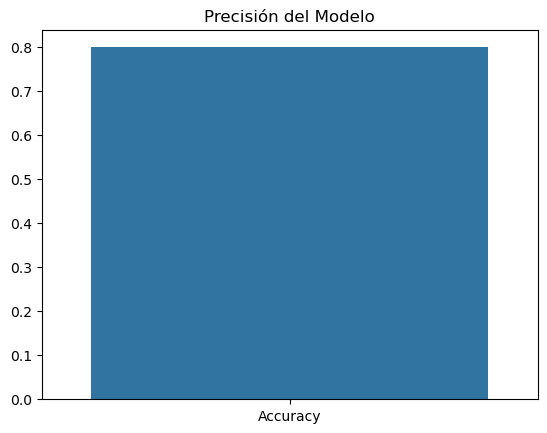

In [30]:
# Gráfico de la precisión
sns.barplot(x=['Accuracy'], y=[accuracy_score(y_test, y_pred)])
plt.title('Precisión del Modelo')
plt.show()


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
         Survived      Pclass         Sex         Age       SibSp 

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

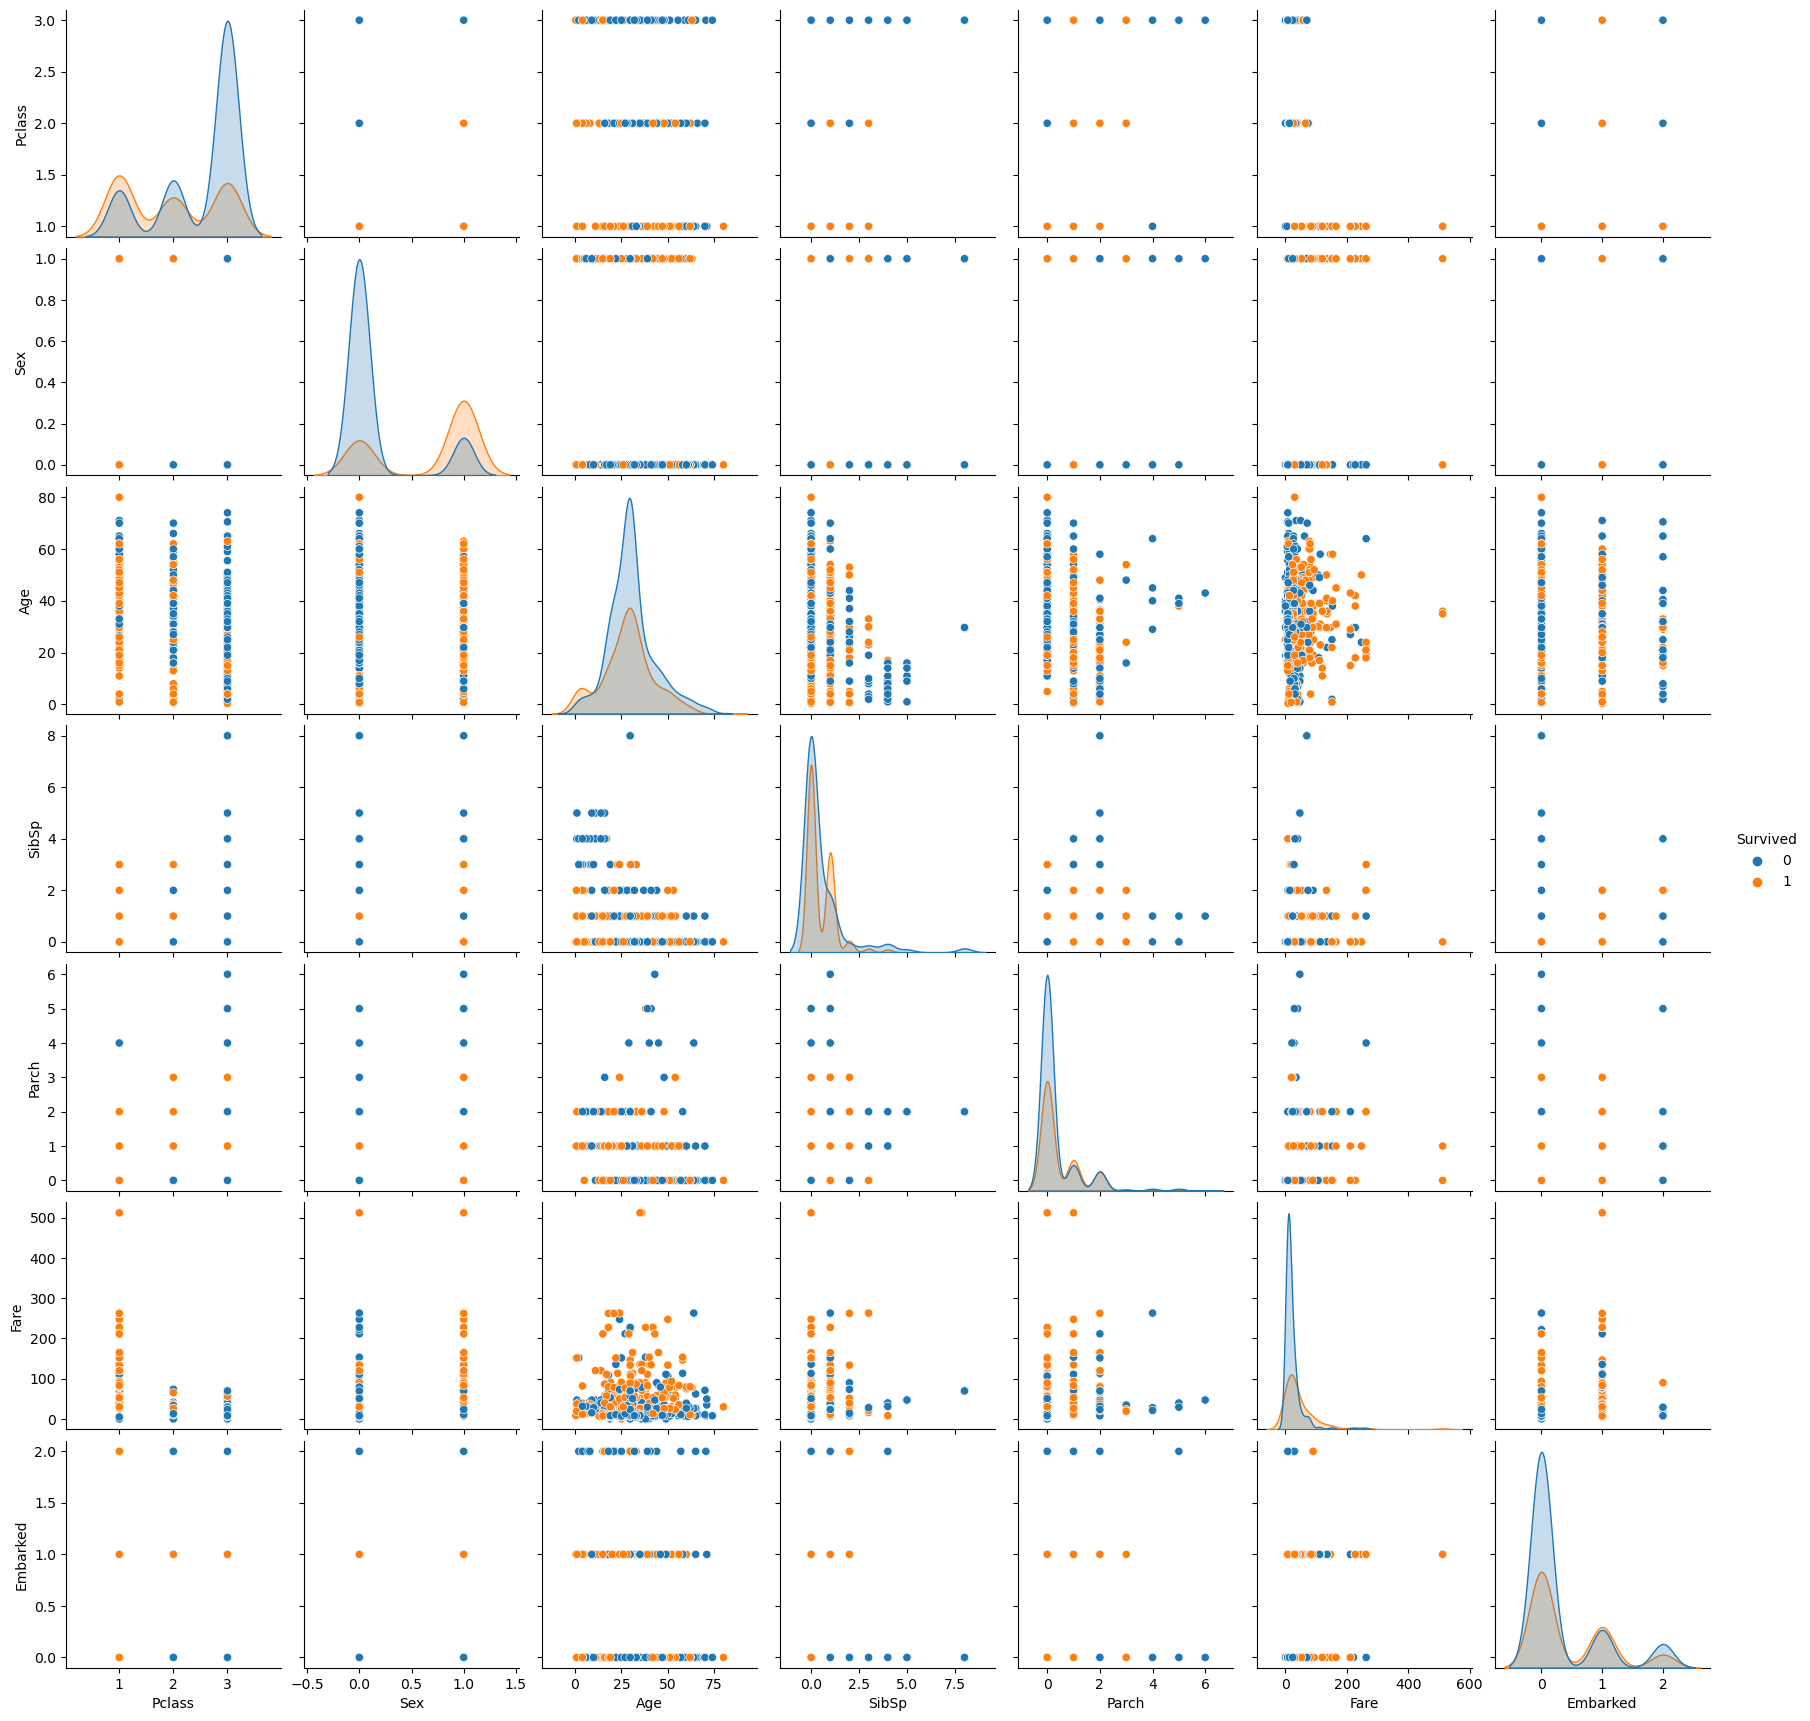

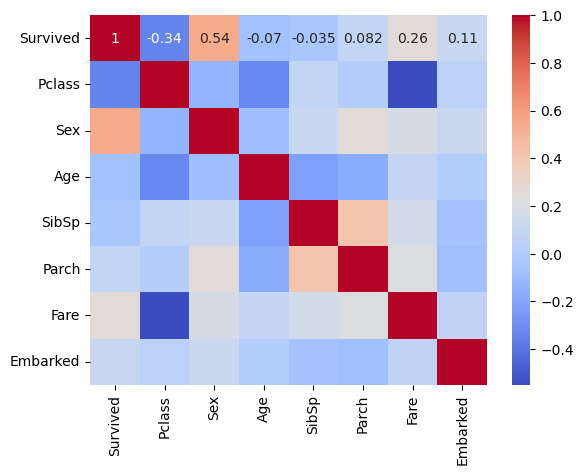

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Ver las primeras filas del dataset
print(data.head())

# Ver información del dataset (tipos de datos, valores nulos, etc.)
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Relación entre variables
sns.pairplot(data, hue='Survived')
plt.show()

# Correlación entre las variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
